#### Pakkar

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import stop_words
import string
from keras.preprocessing import text, sequence
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten, Input, Embedding
from tensorflow.python.keras.optimizers import Adadelta
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, GRU
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [3]:
tf.compat.v1.disable_eager_execution()

In [4]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

#### Innlestur gagna

In [6]:
train_data = pd.read_csv('data/train.csv',delimiter=',')

test_data = pd.read_csv('data/test.csv',delimiter=',')


### Gagnasettið
Hér má sjá gagnasettið sem við þjálfum módelið á. Við erum með comment_text og hann er búið að greina (0 eða 1) hvort hann sé toxic, severe_toxic, obscene, threat, insult eða identity_hate.

In [7]:
display(train_data.head())
cols = train_data.columns
print('Dálkarnir eru: ')
for col in cols:
    print('- \t',col)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Dálkarnir eru: 
- 	 id
- 	 comment_text
- 	 toxic
- 	 severe_toxic
- 	 obscene
- 	 threat
- 	 insult
- 	 identity_hate


In [8]:
display(test_data.head())

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


### Text preprocessing


In [9]:

def textpreprocess(sentence):
    sentence = sentence.lower()
    
    #Taka út ensk stopporð
    stopwords = stop_words.ENGLISH_STOP_WORDS
    for sw in stopwords:
        if len(sw) > 1 and sw in sentence:
            sentence.replace(sw,'')
    
    #Taka út tölur
    sentence = ''.join([i for i in sentence if not i.isdigit()])
    
    #Taka út punkta, kommur og þannig lagað
    sentence=sentence.translate(str.maketrans('', '', string.punctuation))
    
    return sentence

In [10]:
drasl = train_data.to_numpy()

In [11]:
from matplotlib.colors import Normalize

Hér er þá búið að preprocessa textann

In [63]:
def getProcessedText(dataset):
    x_train = dataset.to_numpy()
    for i in range(len(x_train)):
        x_train[i] = textpreprocess(x_train[i])
    return x_train

In [13]:
x_train = train_data['comment_text'].to_numpy()
for i in range(len(x_train)):
    x_train[i] = textpreprocess(x_train[i])

In [14]:
temp= x_train

In [15]:
max_comment_length = len(train_data['comment_text'][0])

for comment in train_data['comment_text']:
    if len(comment) > max_comment_length:
        max_comment_length = len(comment)

In [16]:
def getSubet(dataset, size):
    return dataset[0:size]

Prófa að exclude-a bara toxic dálkinn og gera model á honum

In [17]:
toxicCol = train_data['toxic']
classes = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [18]:
# X_train = train_data['comment_text'].to_numpy()
X_train = temp
# y_train = (train_data.values[:,2:])
y_train = train_data[classes]
print(len(y_train), len(X_train))
# Set aside validation data for monitoring training progress

assert len(X_train) == len(y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

print('=================')
print('|','train_data shape:', X_train.shape)
print('|',X_train.shape[0], 'train samples')
print('|',y_test.shape[0], 'test samples')
print('=================')

159571 159571
| train_data shape: (127656,)
| 127656 train samples
| 31915 test samples


### Hér er gagnasettinu skipt jafn á milli toxic og non toxic commenta
    #### skoða þetta from sklearn.metrics import classification_report

In [21]:
comments = train_data['comment_text']
yData = train_data[classes]

In [26]:
df_majority = train_data[train_data.toxic==0]
df_minority = train_data[train_data.toxic==1]

In [54]:
df_majority=df_majority.sample(frac=1)
df_upsampled = pd.concat([pd.DataFrame(df_majority.values[0:len(df_minority)],columns=train_data.columns)
, df_minority])

In [62]:
df_upsampled=df_upsampled.sample(frac=1)
display(df_upsampled.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
60971,a33e17dbef3837c5,get lost \n\nget lost,1,0,0,0,0,0
125789,a0e666c825065144,yo buddy why are you saying mean shit to me i ...,1,0,0,0,0,0
6669,6a34cdac623eeb97,wow so much for wating until april the jtwcs ...,0,0,0,0,0,0
132267,c3d0e629126c5076,yo if u r going impersonate me at least do m...,1,0,0,0,0,0
8196,fa02aeb2b60ea270,brave man well of you ever do give me an off...,0,0,0,0,0,0


In [64]:
upsampled_y_train = df_upsampled[classes]
upsampled_x_train = df_upsampled['comment_text']

In [65]:
upsampled_x_train = getProcessedText(upsampled_x_train)

In [66]:
assert len(upsampled_x_train) == len(upsampled_y_train)
X_train, X_test, y_train, y_test = train_test_split(upsampled_x_train, upsampled_y_train, test_size=0.2)

print('=================')
print('|','train_data shape:', X_train.shape)
print('|',X_train.shape[0], 'train samples')
print('|',y_test.shape[0], 'test samples')
print('=================')

| train_data shape: (24470,)
| 24470 train samples
| 6118 test samples


In [67]:
max_words = 20000 # <- spurning um hvað þetta eigi að vera
output_vector_len = int(df_upsampled.fillna('').astype(str).apply(lambda x:x.str.len()).mean()[1])
tokenizer = text.Tokenizer(num_words=max_comment_length)
num_classes = 6

tokenizer.fit_on_texts(list(X_train))
tokTrain = tokenizer.texts_to_sequences(X_train)
tokTest = tokenizer.texts_to_sequences(X_test)

x_train=sequence.pad_sequences(tokTrain, maxlen=max_comment_length)
x_test=sequence.pad_sequences(tokTest, maxlen=max_comment_length)


In [68]:
x_train.shape

(24470, 5000)

#### Góð útskýring á multilabel classifier
https://medium.com/@vijayabhaskar96/multi-label-image-classification-tutorial-with-keras-imagedatagenerator-cd541f8eaf24

### 92% acc. model

In [70]:
inp = Input(shape=(max_comment_length,))
model = Sequential()
model = Embedding(max_words, output_vector_len)(inp) 
#Embedded útskýring:
    #Turns positive integers (indexes) into dense vectors of fixed size.
######

#####
model = Dropout(0.5)(model)
model = Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling1D(pool_size=2)(model)
model = Dropout(0.5)(model)
model = Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling1D(pool_size=2)(model)
model = Dropout(0.5)(model)
model = GRU(128)(model)

model = Dense(64, activation="relu")(model)
model = Dense(32, activation="relu")(model)
model = Dense(16, activation="relu")(model)
model = Dense(6, activation="sigmoid")(model)
model = Model(inputs=inp, outputs=model)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5000)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 5000, 330)         6600000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 5000, 330)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5000, 32)          21152     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2500, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2500, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2500, 32)          2080

In [73]:
#Sjá hvernig y- þjálfunargögnin líta út
print(y_train[0:4])

       toxic severe_toxic obscene threat insult identity_hate
112968     1            0       0      0      0             0
1642       0            0       0      0      0             0
71557      1            1       1      0      1             0
7053       0            0       0      0      0             0


In [74]:
batch_size = 32
epochs = 1
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

print('Test acc: {}'.format(score[1]))

Train on 22023 samples, validate on 2447 samples
6118/6118 [==============================] - 75s 12ms/sample - loss: 0.1917 - accuracy: 0.9205
Test acc: 0.9205349683761597


In [75]:
print(x_test.shape)

(6118, 5000)


In [76]:
predictions = model.predict(x_test,batch_size=32, verbose=0)

In [77]:
print(predictions)

[[0.47008893 0.02315657 0.12893164 0.01507867 0.1503449  0.05878903]
 [0.59849006 0.06102102 0.24003151 0.04465153 0.26126352 0.10866596]
 [0.9412674  0.14670779 0.6007785  0.08213215 0.532858   0.15021421]
 ...
 [0.9835127  0.06364855 0.6647508  0.02560893 0.5215145  0.0654731 ]
 [0.9509771  0.02470218 0.3841281  0.00876251 0.33090505 0.03751686]
 [0.87502795 0.04224735 0.3462971  0.02132561 0.32201153 0.06567137]]


In [80]:
assert predictions.shape == y_test.shape
print(predictions.shape)
print(y_test.shape)

(6118, 6)
(6118, 6)


In [143]:
for line in range(predictions.shape[0]):
    for item in range(predictions.shape[1]):
        if predictions[line,item] > 0.5:
            predictions[line,item] = 1
        else:
            predictions[line,item] = 0
        

In [146]:
print(predictions.astype(int))
# x.astype(int)
# print(y_test)

[[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 1 0]
 ...
 [1 0 1 0 1 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


In [104]:
arr = (y_test==predictions)

In [117]:
print(arr.shape)
fjoldi = (arr.shape[0]*arr.shape[1])
print(rett/fjoldi)
print(vitlaust/fjoldi)

(6118, 6)
0.9205350332352621
0.07946496676473794


In [83]:
def plot_acc_params(param, train_acc_, val_acc_, param_name, title):
    plt.plot(param, train_acc_,label='Training accuracy')
    plt.plot(param, val_acc_,label='Validation accuracy')
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def find_best_SVM_params(Cs, gammas, kernel_, xtrain, ytrain, xval, yval):
    training_acc = np.zeros(len(Cs))
    val_acc = np.zeros(len(Cs))
    # ignores the gamma values if linear
    if kernel_ != 'linear':
        training_acc = np.zeros((len(Cs), len(gammas)))
        val_acc = np.zeros((len(Cs), len(gammas)))
    
    for i in range(len(Cs)):
        print("c: ", Cs[i])
        if kernel_ != 'linear':
            for j in range(len(gammas)):
                print("gamma: ", gammas[j], end =" ")
                clf = OneVsRestClassifier(SVC(gamma=gammas[j], C = Cs[i], kernel = kernel_))
                clf.fit(xtrain, ytrain)
                val_acc[i, j] = get_row_accuracy(yval, clf.predict(xval))
                training_acc[i, j] = get_row_accuracy(ytrain, clf.predict(xtrain))
            print()
        else:
            clf = OneVsRestClassifier(SVC(C = Cs[i], kernel = kernel_))
            clf.fit(xtrain, ytrain)
            val_acc[i] = get_row_accuracy(yval, clf.predict(xval))
            training_acc[i] = get_row_accuracy(ytrain, clf.predict(xtrain))
#     print('Train acc \n', training_acc)
#     print('Validation acc \n', val_acc)
    return training_acc, val_acc

# Utility function to move the midpoint of a colormap to be around
# the values of interest.
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plot_heatmap(data_matrix, title, xlabel, ylabel, x_values, y_values, vmin_, midpoint_):
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(data_matrix, interpolation='nearest', cmap=plt.cm.seismic,
               norm=MidpointNormalize(vmin=vmin_, midpoint=midpoint_))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar()
    
    
    plt.xticks(np.arange(len(x_values)), x_values, rotation=45)
    plt.yticks(np.arange(len(y_values)), y_values)
    plt.title(title)
    plt.show()

----------------------------------------------------------------------------------------------------
TN: 2710, FP: 354, FN: 295, TP: 2759
The sensitivity is: 90.341%
The specificity is: 88.446%


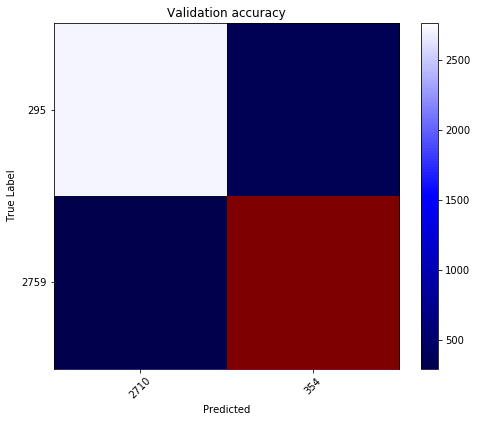

----------------------------------------------------------------------------------------------------
TN: 5792, FP: 9, FN: 294, TP: 23
The sensitivity is: 7.256%
The specificity is: 99.845%


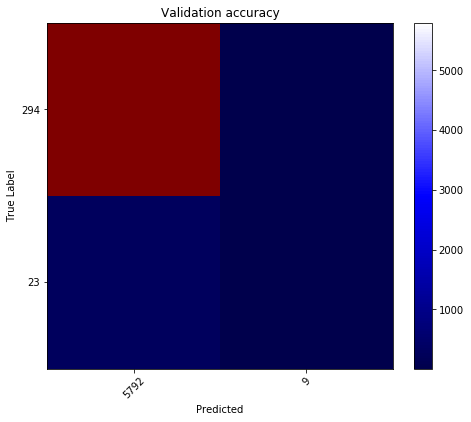

----------------------------------------------------------------------------------------------------
TN: 4024, FP: 507, FN: 196, TP: 1391
The sensitivity is: 87.650%
The specificity is: 88.810%


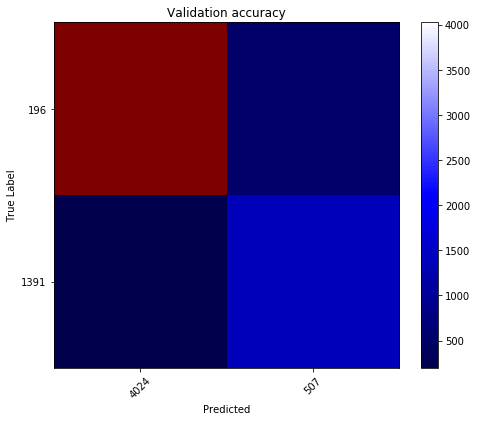

----------------------------------------------------------------------------------------------------
TN: 6039, FP: 0, FN: 79, TP: 0
The sensitivity is: 0.000%
The specificity is: 100.000%


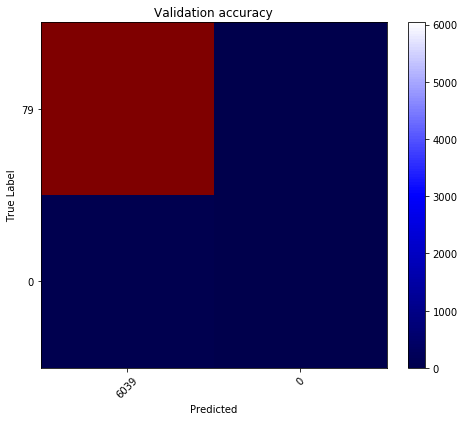

----------------------------------------------------------------------------------------------------
TN: 4063, FP: 583, FN: 314, TP: 1158
The sensitivity is: 78.668%
The specificity is: 87.452%


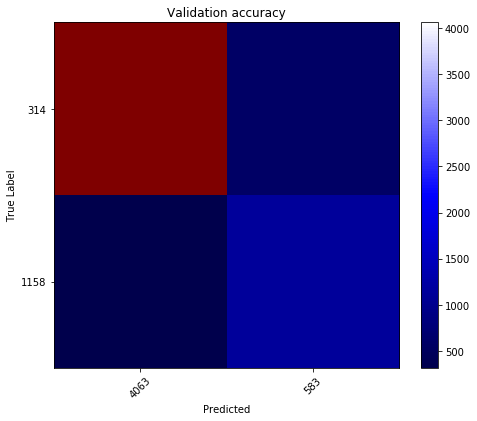

----------------------------------------------------------------------------------------------------
TN: 5832, FP: 0, FN: 286, TP: 0
The sensitivity is: 0.000%
The specificity is: 100.000%


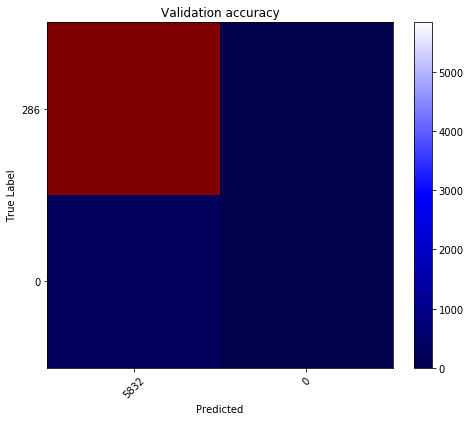

In [148]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
conmat = multilabel_confusion_matrix(y_test.astype(int), predictions.astype(int))
# print(conmat)
for mat in conmat:
    tn, fp, fn, tp  = mat.ravel()
    print('-'*100)
    print("TN: {}, FP: {}, FN: {}, TP: {}".format(tn, fp, fn, tp))
    print("The sensitivity is: {:.3%}".format(tp/(tp+fn)))
    print("The specificity is: {:.3%}".format(tn/(tn+fp)))
    plot_heatmap(mat, 'Validation accuracy', 'Predicted', 'True Label', 
              (tn, fp), (fn,tp), np.min(mat), np.max(mat)-0.01)


In [ ]:
embedding_4 (Embedding) (None, 57, 100) 1238200
_________________________________________________________________
lstm_4 (LSTM) (None, 64) 42240
_________________________________________________________________
dense_8 (Dense) (None, 300) 19500
_________________________________________________________________
dropout_4 (Dropout) (None, 300) 0
_________________________________________________________________
dense_9 (Dense) (None, 1) 301

In [154]:
inp = Input(shape=(max_comment_length,))
model = Sequential()
model = Embedding(max_words, output_vector_len)(inp) 
#Embedded útskýring:
    #Turns positive integers (indexes) into dense vectors of fixed size.
######

#####
model = Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling1D(pool_size=2)(model)
model = Dropout(0.5)(model)
model = Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling1D(pool_size=2)(model)
model = Dropout(0.5)(model)
model = GRU(128)(model)
model = Dense(64, activation="relu")(model)
model = Dense(6, activation="sigmoid")(model)
model = Model(inputs=inp, outputs=model)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
model.summary()


batch_size = 128
epochs = 1
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

print('Test acc: {}'.format(score[1]))


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 5000)]            0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 5000, 330)         6600000   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 5000, 32)          21152     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 2500, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 2500, 32)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 2500, 32)          2080      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 1250, 32)          0   

In [43]:
import matplotlib.pyplot as plt
def teikna(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.plot(val_loss)
    plt.plot(loss)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation','val. loss', 'loss'])
    mynd = plt.show()
    return mynd

## EHV drasl sem ég er ekki að nota atm

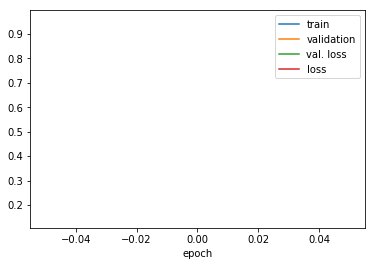

In [44]:
teikna(history)